In [25]:
import lutorpy as lua
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
require("nn")

<Lua table at 0x4174e170>

In [22]:
# minimal example of multi-layer perception(without training code)
mlp = nn.Sequential()
mlp._add(nn.Linear(100, 30))
mlp._add(nn.Tanh())
mlp._add(nn.Linear(30, 10))

<Lua table at 0x410af1e8>

In [23]:
## generate a numpy array and convert it to torch tensor
xn = np.random.randn(100)
xt = torch.fromNumpyArray(xn)
## process with the neural network
yt = mlp._forward(xt)
print(yt)

-0.2665
-0.0735
 0.7400
-0.2511
-0.4166
-0.2414
-0.1211
 0.5000
-0.2814
 0.4170
[torch.DoubleTensor of size 10]



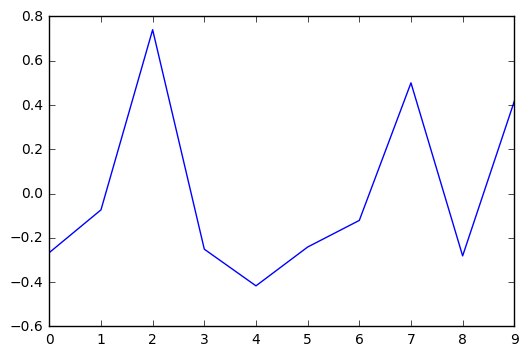

In [26]:
## or for example, you can plot your result with matplotlib
yn = yt.asNumpyArray()
plt.plot(yn)